In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.special as sp
from scipy.interpolate import interp1d
from mcfit import P2xi, xi2P

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [2]:
mattia_table = pd.read_csv(
    "/Users/matteofoglieni/Dropbox/GR_effects/Mattia_Output/PS_doppler_doppler.txt", 
    delim_whitespace=True, names = ["K", "P(K)"]);
mattia_ks = np.array(mattia_table["K"][1:], dtype=float);
mattia_pks = np.array(mattia_table["P(K)"][1:], dtype=float);
mattia_interp_pk = interp1d(mattia_ks, mattia_pks);

In [3]:
mattia_xi_table = pd.read_csv(
    "../MATTIA_OUTPUTS/xi_doppler_L0.txt", 
    delim_whitespace=True, names=["ss", "xis"]);
mattia_ss = np.array(mattia_xi_table["ss"][1:], dtype=float);
mattia_xis = np.array(mattia_xi_table["xis"][1:], dtype=float);
mattia_interp_xi = interp1d(mattia_ss, mattia_xis);

In [22]:
my_xi_table = pd.read_csv(
    "PSM_files/xi_auto_doppler_L0.txt", 
    delim_whitespace=True, names=["ss", "xis"], comment='#');
my_ss = np.array(my_xi_table["ss"][1:], dtype=float);
my_xis = np.array(my_xi_table["xis"][1:], dtype=float);
my_interp_xi = interp1d(my_ss, my_xis);

In [25]:
my_pk_table = pd.read_csv(
    "PSM_files/ps_auto_doppler_L0.txt", 
    delim_whitespace=True, names=["ks", "pks"], comment='#');
my_ks = np.array(my_pk_table["ks"][1:], dtype=float);
my_pks = np.array(my_pk_table["pks"][1:], dtype=float);
my_interp_pk = interp1d(my_ks, my_pks);

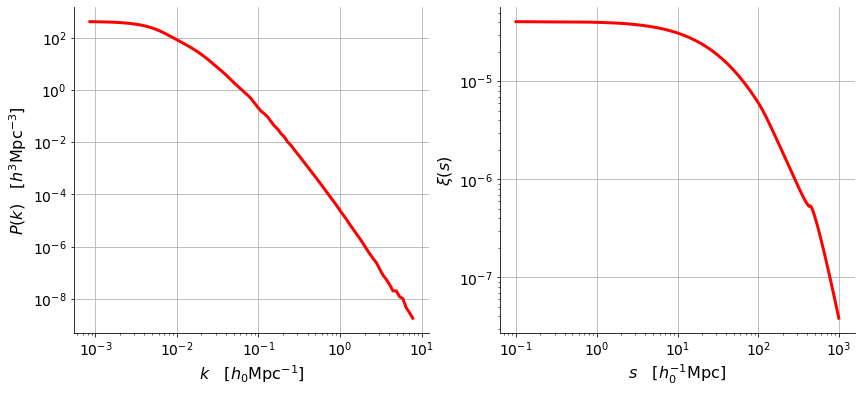

In [13]:
n1, n2 = 0, -1

fig, axs = plt.subplots(1,2,figsize=(14,6))

ax = axs[0]
ax.plot(mattia_ks[n1:n2], mattia_pks[n1:n2], "-r", lw=3);
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$P(k) \quad [h^3 \mathrm{Mpc}^{-3}]$")
ax.set_xlabel(r"$k \quad [h_0\mathrm{Mpc}^{-1}]$")
#ax.legend()
ax.grid();

ax = axs[1]
ax.plot(mattia_ss[n1:n2], mattia_xis[n1:n2], "-r", lw=3);
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\xi(s)$")
ax.set_xlabel(r"$s \quad [h_0^{-1}\mathrm{Mpc}]$")
#ax.legend()
ax.grid();

mcfit convenction for $\xi$:

$$
    \xi_\ell^n(s) = i^\ell \int_{0}^{\infty} \frac{\mathrm{d} k}{2\pi^2} 
        P(k) \, k^{2+n} \, j_\ell(k r) 
$$

mcfit convenction for $P$:

$$
    P_\ell(k) = (-i)^\ell \int_0^\infty \mathrm{d}r \, 4\pi r^2 \,\xi_\ell(r) j_\ell(kr) 
$$

In [14]:
calc_ks, temp_pks = P2xi(mattia_ss, l=0, n=0, deriv=0)(mattia_xis);
calc_pks = temp_pks / (32 *np.pi**3)
interp_pk = interp1d(calc_ks, calc_pks);

/opt/anaconda3/lib/python3.7/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/opt/anaconda3/lib/python3.7/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


In [16]:
calc_ss, temp_xis = xi2P(mattia_ks, l=0, deriv=0)(mattia_pks);
calc_xis = temp_xis / (4)
interp_xi = interp1d(calc_ss, calc_xis);

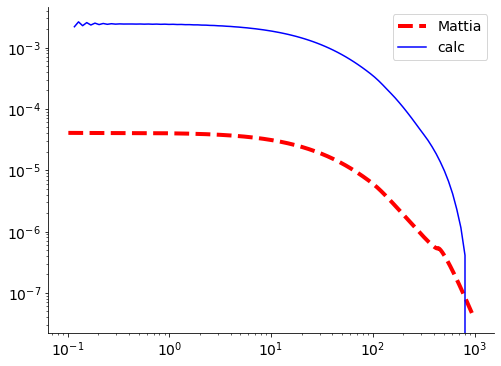

In [32]:
n1, n2 = 1, -1

#xs1, ys1 = mattia_ss[n1:n2], mattia_xis[n1:n2]
#xs2, ys2 = calc_ss[n1:n2], calc_xis[n1:n2]
#spline = mattia_interp_xi
#xs1, ys1 = mattia_ks[n1:n2], mattia_pks[n1:n2]
#xs2, ys2 = calc_ks[n1:n2], calc_pks[n1:n2]
#spline = mattia_interp_pk

xs1, ys1 = my_ss[n1:n2], my_xis[n1:n2]
xs2, ys2 = calc_ss[n1:n2], calc_xis[n1:n2]

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(xs1, ys1, color="red", ls="dashed", lw=4, label="Mattia")
ax.plot(xs2, ys2, "-b", ms=1, label="calc")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend();